<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Baltimore Salaries

_Authors: Greg Baker (SYD)_

---

The City of Baltimore publish data about all their employees, including their salaries.
Their annual salary can differ from their gross pay: perhaps they have overtime and earn
more than their official salary, perhaps they are only employed for a part of the year
and earn less.

In this lab we'll look estimate what a typical City of Baltimore employee's gross pay will be 
based on their annual salary.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Read the dataset

The Baltimore salaries data set is in "datasets/Baltimore_City_Employee_Salaries_2011.csv". 
You can use column 0 as an index. Column 4 is a date.

In [2]:
# A:
salaries = pd.read_csv('../datasets/Baltimore_City_Employee_Salaries_2011.csv', 
                       index_col=0,
                      parse_dates=[4])
salaries.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
Name,,,,,,
"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,$50845.00,$45505.94
"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,$56595.00,$51588.89
"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,$56500.00,$50633.26
"Abdal-Rahim,Naim A",EMT Firefighter,A64063,Fire Academy Recruits,2011-03-30,$33476.00,$3888.95
"Abdi,Ezekiel W",POLICE OFFICER,A99398,Police Department,2007-06-14,$50919.00,$51421.73


## Pre-processing to have numbers instead of strings 

The AnnualSalary and GrossPay columns are strings and start with a $. Strip this off and convert
these columns to floats.

In [3]:
# A:
salaries.AnnualSalary = salaries.AnnualSalary.str.strip('$').astype(float)
salaries.GrossPay = salaries.GrossPay.str.strip('$').astype(float)
salaries.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
Name,,,,,,
"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,50845.0,45505.94
"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,56595.0,51588.89
"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,56500.0,50633.26
"Abdal-Rahim,Naim A",EMT Firefighter,A64063,Fire Academy Recruits,2011-03-30,33476.0,3888.95
"Abdi,Ezekiel W",POLICE OFFICER,A99398,Police Department,2007-06-14,50919.0,51421.73


## Exploratory Data Analysis

Create a scatter plot of Annual Salary vs Gross Pay

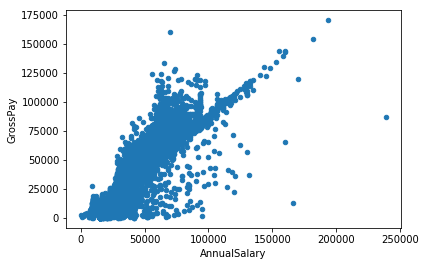

In [4]:
# A:
salaries.plot.scatter(x='AnnualSalary', y='GrossPay')

/Users/edoardo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


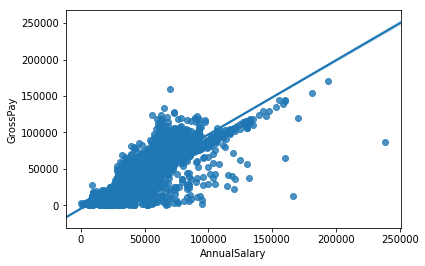

In [5]:
sns.regplot('AnnualSalary', 'GrossPay', data=salaries)

# Look for a linear relationship

It seems like there is a linear relationship in there, but it is obscured by a lot of noise.

Split the data into a test and training data set.

In [6]:
# A:
import sklearn.model_selection

(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(salaries[['AnnualSalary']],
                                                                          salaries.GrossPay)

## Ordinary Least Squares

The errors in the graph above don't look evenly balanced, which doesn't bode well for ordinary least squares.

Let's see what it gives us: import sklearn.linear_models, create an ordinary least squares regressor
and train it

In [7]:
import sklearn.linear_model

ols = sklearn.linear_model.LinearRegression()
ols.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualise

Plot the test data, and plot the predictions from the linear model over it. OLS
will generally predict a gross salary that is a little too high.

Text(0,0.5,'Gross Salary')

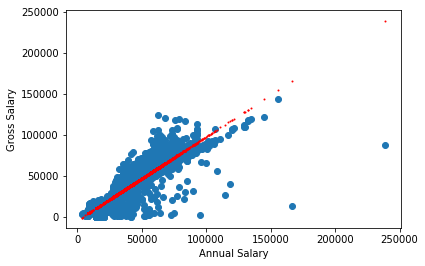

In [8]:
ols_predictions = ols.predict(Xtest)
(fig, ax) = plt.subplots()
ax.scatter(Xtest, Ytest)
ax.scatter(Xtest, ols_predictions, c='red', s=1)
ax.set_xlabel('Annual Salary')
ax.set_ylabel("Gross Salary")

### Measure

Initially, let's look at three metrics to understand how well this line represents the data.

- Calculate the $R^2$ score for the predictions it made
- Calculate the median absolute error
- Calculate the mean absolute error

Remember that sklearn.metrics has functions for doing all of these.

In [9]:
# A:
import sklearn.metrics

print("R^2 = ",sklearn.metrics.r2_score(Ytest, ols_predictions))
print("Median absolute error = ",sklearn.metrics.median_absolute_error(Ytest, ols_predictions))
print("Mean absolute error = ",sklearn.metrics.mean_absolute_error(Ytest, ols_predictions))

R^2 =  0.7714027860718434
Median absolute error =  3554.968986887092
Mean absolute error =  6355.254216960109


## Robust Regression

Perform the same analysis using Theil-Sen, RANSAC and Huber.

### Theil-Sen

Train the Theil-Sen regressor, plot its predictions for the test data and calculate the 
three metrics above. You can copy and paste most of the code you wrote.

Expect to see the $R^2$ worse -- and perhaps other metrics worse -- but a better-looking fit.

Text(0,0.5,'Gross Salary')

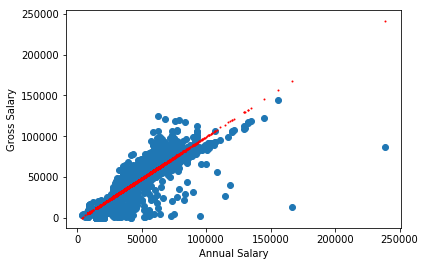

In [10]:
import sklearn.linear_model
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(Xtrain, Ytrain)
ts_predictions = ts.predict(Xtest)
(fig, ax) = plt.subplots()
ax.scatter(Xtest, Ytest)
ax.scatter(Xtest, ts_predictions, c='red', s=1)
ax.set_xlabel('Annual Salary')
ax.set_ylabel("Gross Salary")

In [11]:
print("R^2 = ",sklearn.metrics.r2_score(Ytest, ts_predictions))
print("Median absolute error = ",sklearn.metrics.median_absolute_error(Ytest, ts_predictions))
print("Mean absolute error = ",sklearn.metrics.mean_absolute_error(Ytest, ts_predictions))

R^2 =  0.7675990598157707
Median absolute error =  3797.0351718673664
Mean absolute error =  6422.850437983169


## RANSAC

As above, using RANSAC

Text(0,0.5,'Gross Salary')

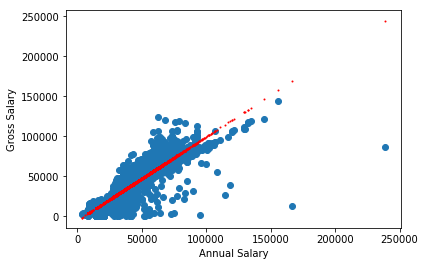

In [12]:
import sklearn.linear_model
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, Ytrain)
ransac_predictions = ransac.predict(Xtest)
(fig, ax) = plt.subplots()
ax.scatter(Xtest, Ytest)
ax.scatter(Xtest, ransac_predictions, c='red', s=1)
ax.set_xlabel('Annual Salary')
ax.set_ylabel("Gross Salary")

In [13]:
print("R^2 = ",sklearn.metrics.r2_score(Ytest, ransac_predictions))
print("Median absolute error = ",sklearn.metrics.median_absolute_error(Ytest, ransac_predictions))
print("Mean absolute error = ",sklearn.metrics.mean_absolute_error(Ytest, ransac_predictions))

R^2 =  0.769328179097653
Median absolute error =  3845.7367573702104
Mean absolute error =  6403.301711706654


## Huber

If you are running a version old version of scikit-learn (0.18 or earlier) you might not have the
option to create a Huber regressor.

Text(0,0.5,'Gross Salary')

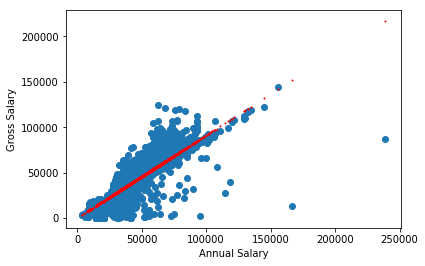

In [14]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
huber_predictions = huber.predict(Xtest)
(fig, ax) = plt.subplots()
ax.scatter(Xtest, Ytest)
ax.scatter(Xtest, huber_predictions, c='red', s=1)
ax.set_xlabel('Annual Salary')
ax.set_ylabel("Gross Salary")

In [15]:
print("R^2 = ",sklearn.metrics.r2_score(Ytest, huber_predictions))
print("Median absolute error = ",sklearn.metrics.median_absolute_error(Ytest, huber_predictions))
print("Mean absolute error = ",sklearn.metrics.mean_absolute_error(Ytest, huber_predictions))

R^2 =  0.7651187189511637
Median absolute error =  2660.3409874038625
Mean absolute error =  6286.304792864142


## Review

- Which model had the highest $R^2$ score? Why is this obvious?
- Which model had the lowest median absolute error?
- Which model had the lowest mean absolute error?

In [16]:
# A:

# OLS will always have the highest R^2 score, because that's what it maximises
# Huber usually wins on median absolute error and mean absolute error

# Commercial Analysis

You are the hiring manager at the City of Baltimore. New employees regularly ask
how much they are actually likely to earn given the salary that they are about to
agree to.

You don't want to give an answer that is too high because then you might be setting
the city at risk of a lawsuit for misrepresenting the job. You don't want to give an
answer that is too low because then the candidate might pass up on the job and work
elsewhere.

You decide that it will cost \\$0.05 in law-suit danger for each dollar that you 
over-represent, but only \\$0.01 for each dollar that you under-represent.

e.g. if a candidate is actually likely to earn \\$100,000 and you say \\$120,000, this
is worth \$10,000 in potential law-suits for mis-representation. If you say \\$80,000
then that will cost you \\$200 in potential recruiters' fees to find someone else.

## Evaluate existing models

You will need to choose between the four models that you have built. You would
choose based on the one which costs the City the least amount of money if you had
used it on all the employees in your test data set.

Write a scoring function that returns the dollar value given an estimator, an
Xtest set, and a Ytest set.

In [17]:
# A:
def answer_cost(estimator, X, y):
    predictions = list(estimator.predict(X))
    y = list(y)
    cost = 0.0
    for i in range(len(y)):
        if predictions[i] > y[i]:
            cost += 0.05 * (predictions[i] - y[i])
        elif predictions[i] < y[i]:
            cost += 0.01 * (y[i] - predictions[i])
        else:
            cost += 0.0
    return cost

### Score the four models using this function

- OLS
- RANSAC
- Theil-Sen
- Huber

In [18]:
# A:
print("Cost of OLS:",answer_cost(ols, Xtest, Ytest))
print("Cost of Theil-Sen:",answer_cost(ts, Xtest, Ytest))
print("Cost of RANSAC:",answer_cost(ransac, Xtest, Ytest))
print("Cost of Huber:",answer_cost(huber, Xtest, Ytest))

Cost of OLS: 685328.7391224426
Cost of Theil-Sen: 794684.6833701864
Cost of RANSAC: 738818.4943803021
Cost of Huber: 647780.6923394974
